In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
data = pd.read_csv('PSDV_Assignment_3_Data/Data.csv')
state_data = pd.read_csv('PSDV_Assignment_3_Data/State_data.csv')
funding = pd.read_csv('PSDV_Assignment_3_Data/NCAP_Funding.csv')

# Spatial Aggregation

**1. Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?**

In [3]:
mean = data.groupby('state')['PM2.5'].mean()
print(f"State having highest PM2.5 concentration is {mean.idxmax()} with average PM2.5 concentration of {mean.max()}")

State having highest PM2.5 concentration is Delhi with average PM2.5 concentration of 104.1009176780069


**2. Which state (consider all stations in that state) had the most days with hazardous PM2.5
levels (above 300 µg/m³) for the year 2023?**

In [4]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

mask1 = (data["PM2.5"] > 300) & (data["Timestamp"].dt.year == 2023)
copy1 = data[mask1].copy()
day_count = copy1.groupby('state')['Timestamp'].nunique()

print(f"The state with most hazardous PM2.5 levels is {day_count.idxmax()} having {day_count.max()} hazardous days")

The state with most hazardous PM2.5 levels is Delhi having 49 hazardous days


**3. Which state has the highest variability in PM2.5 levels across its monitoring stations in
2023? (Think how would you measure variability)**

In [5]:
# We can measure the variability in various methods out of which the most common are 'Standard Deviation', 'Coefficient of Variation', 'Range', etc.
# In the below code, we are measuring variability by Standard Deviation.
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

mask2 = data["Timestamp"].dt.year == 2023
copy2 = data[mask2].copy()

deviation = copy2.groupby('state')['PM2.5'].std()

print(f"The state having highest variability in PM2.5 levels in 2023 is {deviation.idxmax()} with the Standard Deviation of {deviation.max()}")

The state having highest variability in PM2.5 levels in 2023 is Delhi with the Standard Deviation of 82.79710576209911


**4. Which state has the lowest average PM2.5 levels during the Covid period (The year
2020-2021 both years inclusive)?**

In [6]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

mask3 = (data["Timestamp"].dt.year <= 2021) & (data["Timestamp"].dt.year >= 2020)
copy3 = data[mask3].copy()

average = copy3.groupby('state')['PM2.5'].mean()

print(f"State having lowest PM2.5 average during Covid period is {average.idxmin()} with an average of {average.min()}")

State having lowest PM2.5 average during Covid period is Mizoram with an average of 14.323350150801287


# Temporal Aggregation

**1. Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.**

In [7]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

mask4 = (data['Timestamp'].dt.year == 2020) & (data['Timestamp'].dt.month == 8)
copy4 = data[mask4].reset_index()

index = copy4['PM2.5'].argmax()
station = copy4['station'][index]

print(f"The station that recorded highest value of PM2.5 for the month August of 2020 is {station} with the PM2.5 value of {copy4['PM2.5'][index]}")

The station that recorded highest value of PM2.5 for the month August of 2020 is Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB with the PM2.5 value of 805.51


**2. For the year 2018, calculate the average PM2.5 concentration for each season
(Seasons being Winter: December-February, Summer: March-May, and Monsoon:
June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB.
Identifying the season with the highest pollution.
[Thought Question] Can you suggest some potential factors on why certain seasons are
generally more polluted than others?**

In [8]:
def assign_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Summer"
    elif month in [6, 7, 8, 9]:
        return "Monsoon"

data_2018 = data[data['Timestamp'].dt.year == 2018]

station_name = "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"
data_2018 = data_2018[data_2018['station'] == station_name]

data_2018["season"] = data_2018["Timestamp"].dt.month.apply(assign_season)

season_average = data_2018.groupby('season')['PM2.5'].mean()

print(f"The season with maximum average PM2.5 values is {season_average.idxmax()} with an average of {season_average.max()}")

The season with maximum average PM2.5 values is Winter with an average of 67.4923443634478


In the Winter season, the wind speed is low resulting the pollutants to accumulate at a place. Also in Winters there is more amount of carbon susbtance burning for heating purposes. While in Summer, the amount of carbon substance burning is less and also the wind speeds are much higher than in winters resulting in non-accumulation of pollutants in one area. In Monsoon season, the rainfall clears the environment dur to capture of pollutants by raindrops and wind circulation in Monsoon is also high.

**3. Compare the average PM2.5 levels during weekends and weekdays for the station Lal
Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to
show these trends Steps:
a. Calculate the monthly average PM2.5 for weekdays and weekends separately
b. X-axis: Months (January to December).
c. Y-axis: Average PM2.5 levels.
d. Use two lines: one for the monthly average PM2.5 levels on weekdays and one
for weekends.**

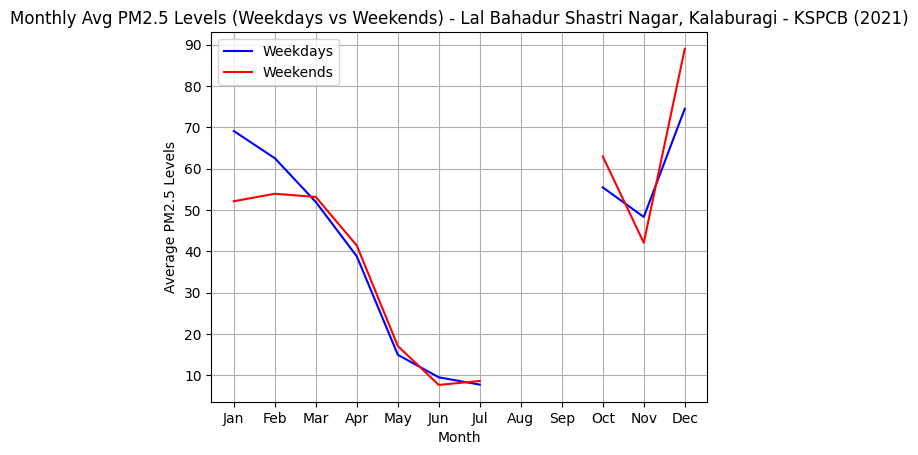

In [37]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"], errors='coerce')

station_name = "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"
df = data[(data["Timestamp"].dt.year == 2021) & (data["station"] == station_name)].copy()

df["Month"] = df["Timestamp"].dt.month
df["DayOfWeek"] = df["Timestamp"].dt.weekday
df["IsWeekend"] = df["DayOfWeek"] >= 5

weekday_avg = df[df["IsWeekend"] == False].groupby("Month")["PM2.5"].mean()
weekend_avg = df[df["IsWeekend"] == True].groupby("Month")["PM2.5"].mean()

plt.plot(weekday_avg.index, weekday_avg, label="Weekdays", color="blue")
plt.plot(weekend_avg.index, weekend_avg, label="Weekends", color="red")

plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel("Month")
plt.ylabel("Average PM2.5 Levels")
plt.title(f"Monthly Avg PM2.5 Levels (Weekdays vs Weekends) - {station_name} (2021)")
plt.legend()
plt.grid(True)
plt.show()

# Spatio-temporal aggregation

**1. For each state, calculate the percentage increase or decrease in PM2.5 levels during
monsoon months (June to September) compared to summer months (March to May).
Which state has the most difference (increase or decrease) for the year 2022?**

In [17]:
def assign_season(month):
    if month in [3, 4, 5]:
        return "Summer"
    elif month in [6, 7, 8, 9]:
        return "Monsoon"
    else:
        return "Winter"

data_2022= data[data['Timestamp'].dt.year == 2022]
data_2022["season"]=data_2022['Timestamp'].dt.month.apply(assign_season)
data_2022summer=data_2022[data_2022['season']=='Summer']
data_2022monsoon=data_2022[data_2022['season']=='Monsoon']
monsoon_avg = data_2022monsoon.groupby('state')['PM2.5'].mean()
summer_avg = data_2022summer.groupby('state')['PM2.5'].mean()
percent_change = ((monsoon_avg - summer_avg) / summer_avg) * 100
def assign_type(percent_change):
  if percent_change>0:
    return "increase"
  else:
    return "decrease"

monsoon_avg["type"]=percent_change.apply(assign_type)
summer_avg["type"]=percent_change.apply(assign_type)
percent_change_abs = percent_change.abs()

max_diff_state = percent_change_abs.idxmax()
max_diff_value = percent_change_abs.max()

# Check the type of change (increase or decrease) for the state with the largest difference
max_diff_type = percent_change[max_diff_state]

print(f"The state with the most difference in PM2.5 levels between monsoon and summer months in 2022 is {max_diff_state}, with a {max_diff_value:.2f}% {assign_type(max_diff_type)}")

The state with the most difference in PM2.5 levels between monsoon and summer months in 2022 is Assam, with a 61.18% decrease


C:\Users\Pratik Kumar Dhakar\AppData\Local\Temp\ipykernel_26684\2729305402.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2022["season"]=data_2022['Timestamp'].dt.month.apply(assign_season)


**2. Plot the average PM2.5 levels for Delhi across each season (Winter:
December-February, Summer: March-May, Monsoon: June-September) from 2017 to
2023. What seasonal variation, if any, can you observe in pollution levels?**

C:\Users\Pratik Kumar Dhakar\AppData\Local\Temp\ipykernel_26684\2042139302.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_delhi["season"]=data_delhi['Timestamp'].dt.month.apply(assign_season)


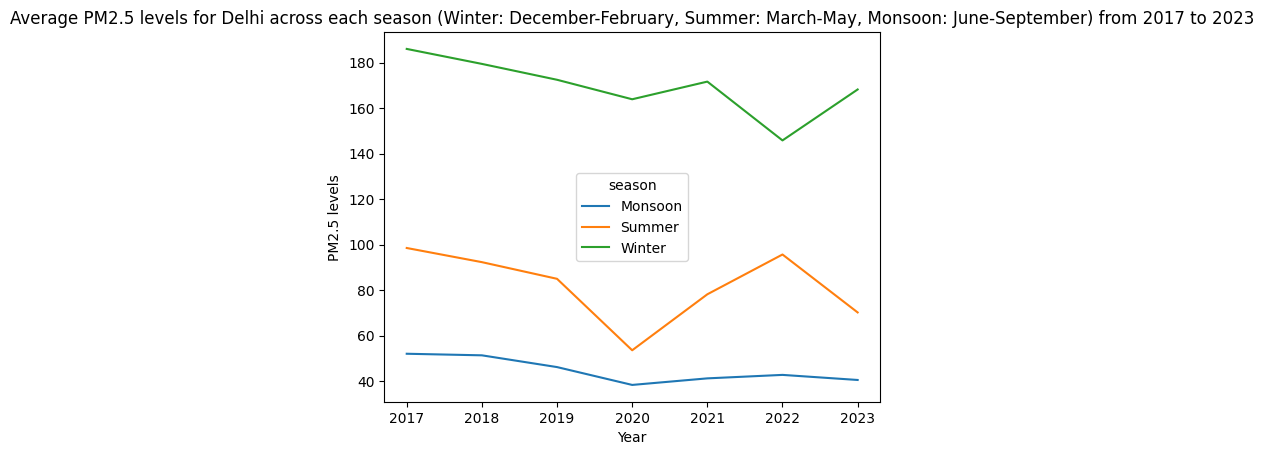

'Observation:\nSummer: There was a significant decrease in pollution level in summer of 2020 which corressponds to factors covid lockdown"\nMonsoon: PM2.5 levels are nearly constant over the years and lowest among other seasons due to the washout of pollutants by the rain"\nwinter: levels have slighly decreased over the years on average '

In [18]:
data=data[data["Timestamp"].dt.year.isin([2017,2018,2019,2020,2021,2022,2023])]
data_delhi=data[data["state"]=="Delhi"]
def assign_season(month):
    if month in [3, 4, 5]:
        return "Summer"
    elif month in [6, 7, 8, 9]:
        return "Monsoon"
    else:
        return "Winter"
data_delhi["season"]=data_delhi['Timestamp'].dt.month.apply(assign_season)
val=data_delhi.groupby([data_delhi["Timestamp"].dt.year,"season"])["PM2.5"].mean().unstack()
val.plot(kind="line")
plt.xlabel("Year")
plt.ylabel("PM2.5 levels")
plt.title("Average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023")
plt.show()
'''Observation:
Summer: There was a significant decrease in pollution level in summer of 2020 which corressponds to factors covid lockdown"
Monsoon: PM2.5 levels are nearly constant over the years and lowest among other seasons due to the washout of pollutants by the rain"
winter: levels have slighly decreased over the years on average '''

**3. Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to
2023. Which city had more fluctuations? (Hint: Think what fluctuation means)**

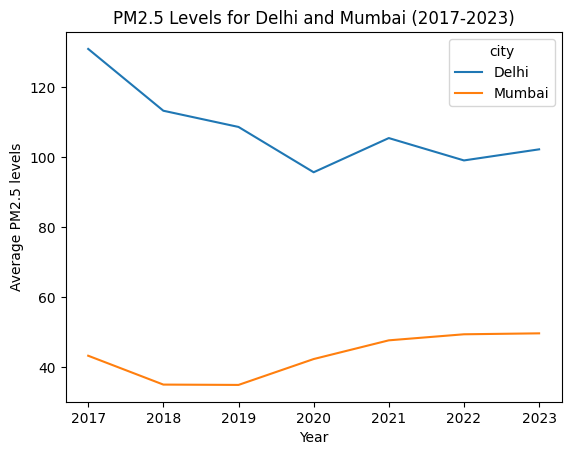

'Delhi had more fluctuations as we can see differing slopes of lines in plots of each city'

In [19]:
datac = data[data["state"].isin(["Delhi", "Maharashtra"])]
datac = datac[datac["Timestamp"].dt.year.isin([2017, 2018, 2019, 2020, 2021, 2022, 2023])]
def assign_city(city):
    if city == "Delhi":
        return "Delhi"
    if city=="Mumbai":
        return "Mumbai"
datac["city"] = datac["city"].apply(assign_city)
val = datac.groupby([datac["Timestamp"].dt.year, "city"])["PM2.5"].mean().unstack()
val.plot(kind="line")
plt.xlabel("Year")
plt.ylabel("Average PM2.5 levels")
plt.title("PM2.5 Levels for Delhi and Mumbai (2017-2023)")
plt.show()
'''Delhi had more fluctuations as we can see differing slopes of lines in plots of each city'''

# Population-Based 

**1. Which state in India has the highest number of monitoring stations relative to its
population?**

In [20]:
stations_per_state = data.groupby('state')['station'].count()
stations_with_population = pd.merge(stations_per_state, state_data[['State', 'Population']], left_on='state', right_on='State')
stations_with_population.rename(columns={'State': 'state'}, inplace=True)
stations_with_population.rename(columns={'station': 'stations'}, inplace=True)

print(stations_with_population)
stations_with_population['stations_per_capita'] = stations_with_population['stations'] / stations_with_population['Population']
max_station_state = stations_with_population.loc[stations_with_population['stations_per_capita'].idxmax()]
print()
print(f"The state with the highest number of monitoring stations relative to its population is {max_station_state['state']}.")
print(f"It has a stations-to-population ratio of {max_station_state['stations_per_capita']}.")

    stations              state  Population
0      30672     Andhra Pradesh    49577103
1       2556  Arunachal Pradesh     1383727
2      23004              Assam    31205576
3      86904              Bihar   104099452
4       7668         Chandigarh     1055450
5      35784       Chhattisgarh    25545198
6     102240              Delhi    16787941
7      43452            Gujarat    60439692
8      76680            Haryana    25351462
9       2556   Himachal Pradesh     6864602
10      2556  Jammu and Kashmir    12267032
11     10224          Jharkhand    32988134
12    107352          Karnataka    61095297
13     23004             Kerala    33406061
14     71568     Madhya Pradesh    72626809
15    237708        Maharashtra   112374333
16      5112            Manipur     2570390
17      5112          Meghalaya     2966889
18      2556            Mizoram     1097206
19      2556           Nagaland     1978502
20     48564             Odisha    41974219
21      2556         Puducherry 

**2. Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5
exposure in 2023.**

<Axes: xlabel='state'>

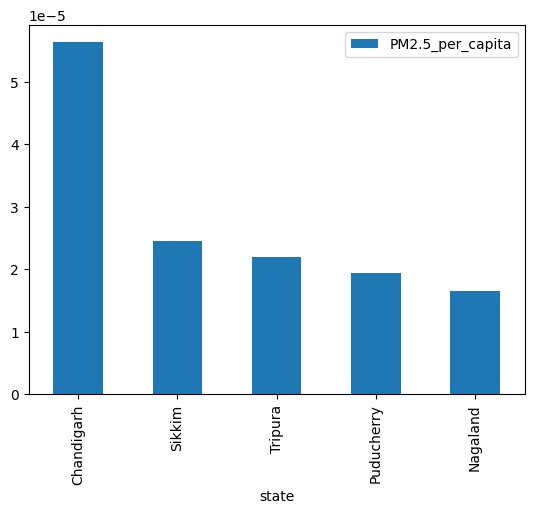

In [21]:
datac=data[data["Timestamp"].dt.year ==2023]
datac=datac.groupby("state")["PM2.5"].mean().reset_index()
datac=pd.merge(datac,state_data[["State","Population"]],left_on="state",right_on="State")
datac["PM2.5_per_capita"]=datac["PM2.5"]/datac["Population"]
datac=datac.sort_values(by="PM2.5_per_capita",ascending=False)
datac=datac.head(5)
datac.plot(kind="bar",x="state",y="PM2.5_per_capita")
#we see le-5 at top of bar graph to reporesent the small values.

**3. Plot the relationship between population density and average PM2.5 concentration for
each state. What conclusion can you draw about the correlation between population
density and pollution?
a. X-axis: Population density (people per square kilometer).
b. Y-axis: Average PM2.5 concentration.
c. Use a scatter plot to show the relationship, where each point represents a state**

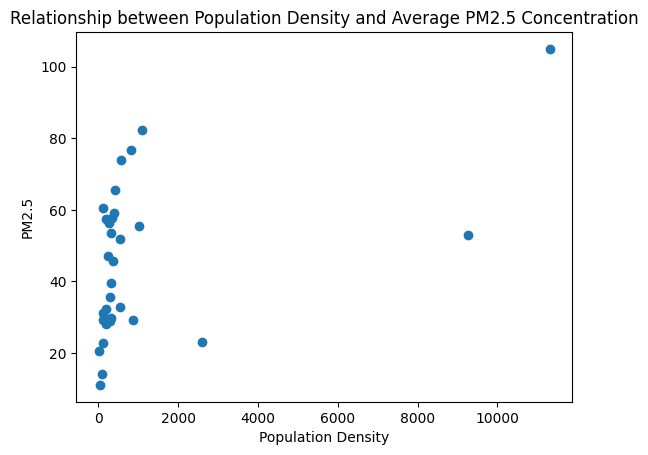

'we can say that roughly with increase in population density the pm2.5 levels increases'

In [22]:
datac=data.groupby("state")["PM2.5"].mean().reset_index()
datac = pd.merge(datac, state_data[['State', 'Population', 'Area (km2)']], left_on='state', right_on='State')
datac["Population_Density"]=datac["Population"]/datac["Area (km2)"]
plt.scatter(x=datac["Population_Density"],y=datac["PM2.5"])


plt.xlabel("Population Density")
plt.ylabel("PM2.5")
plt.title("Relationship between Population Density and Average PM2.5 Concentration")
plt.show()
'''we can say that roughly with increase in population density the pm2.5 levels increases'''

# Area Based

**1. Which state has the highest PM2.5 concentration per square kilometer? Plot the
pollution levels for all states relative to their area.
a. X-axis: States.
b. Y-axis: PM2.5 concentration per square kilometer.
c. Use a bar plot where each bar represents a state, and the height shows PM2.5
per sq km.**

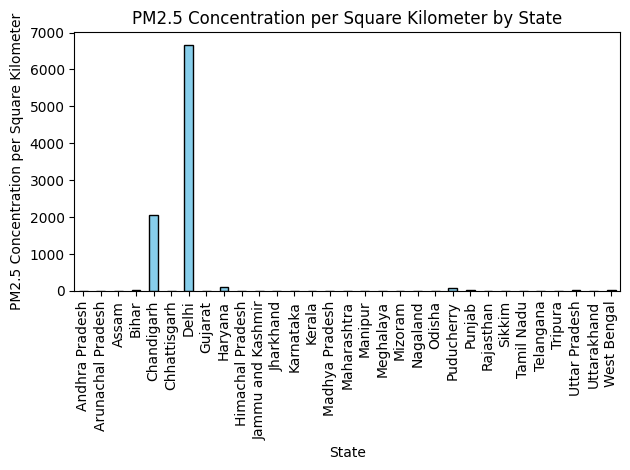

The state having maximum PM2.5 concentration per square kilometer is Delhi having PM2.5 concentration per sqaure kilometer 6673.121359079137


In [10]:
merged = pd.merge(data,state_data,left_on='state',right_on='State',how='inner').drop(columns=['state'])
merged['PM per area'] = merged['PM2.5']/merged['Area (km2)']
merged_state = merged.groupby('State')['PM per area'].sum()
merged_state.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('PM2.5 Concentration per Square Kilometer by State')
plt.xlabel('State')
plt.ylabel('PM2.5 Concentration per Square Kilometer')
plt.tight_layout()
plt.show()
print(f"The state having maximum PM2.5 concentration per square kilometer is {merged_state.idxmax()} having PM2.5 concentration per sqaure kilometer {merged_state.max()}")

**2. Compare the total number of monitoring stations per square kilometer in each state.
Identify the state with the highest density of monitoring stations relative to its area. Show
a bar plot where each bar represents a state, and the height shows the number of
monitoring stations per square kilometer.**

The state having highest density of monitoring stations relative to its area is Delhi with the value of 0.026954177897574125


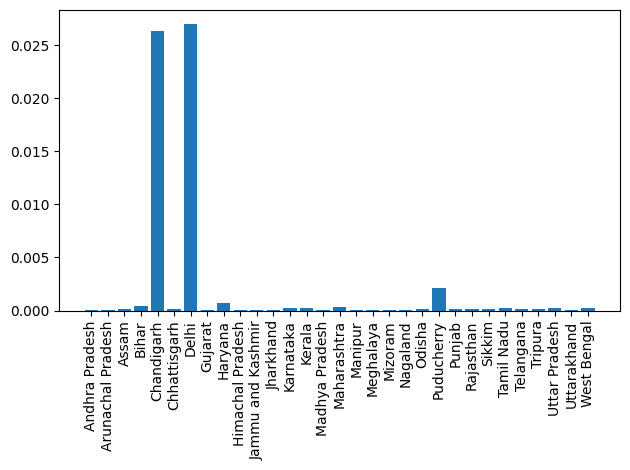

In [11]:
station_counts = data.groupby("state")["station"].nunique().reset_index()
station_counts.rename(columns={"Total_Stations": "Station_Name"}, inplace=True)
station_counts
merged2 = pd.merge(station_counts, state_data, left_on='state', right_on='State').drop(columns=['State'])
merged2['Station per kilometer'] = merged2['station']/merged2['Area (km2)']
maximum = merged2['Station per kilometer'].argmax()
print(f"The state having highest density of monitoring stations relative to its area is {merged2['state'][maximum]} with the value of {merged2['Station per kilometer'].max()}")
x = merged2['state']
y = merged2['Station per kilometer']
plt.bar(x,y)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**3. Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the
year 2021. Given that both states have similar area sizes but different population
densities, analyze how population density impacts pollution levels in these two states.**

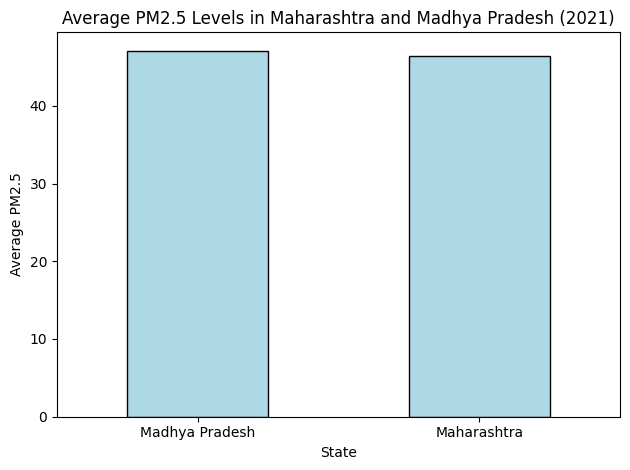

       PM2.5           State  population_density
4  47.095952  Madhya Pradesh          235.608557
1  46.440044     Maharashtra          365.192023


In [12]:
merged_2021 = merged[merged['Timestamp'].dt.year == 2021]
merge_2021_states = merged_2021[merged_2021['State'].isin(['Maharashtra', 'Madhya Pradesh'])]

merge_2021_states_2 = merge_2021_states.groupby('State')['PM2.5'].mean()

state_data['population_density'] = state_data['Population'] / state_data['Area (km2)']

merged3 = pd.merge(merge_2021_states_2, state_data[['State', 'population_density']], left_index=True, right_on='State')
merged3
merged3.plot(kind='bar', x='State', y='PM2.5', color='lightblue',edgecolor='black', legend=False)
plt.title('Average PM2.5 Levels in Maharashtra and Madhya Pradesh (2021)')
plt.xlabel('State')
plt.ylabel('Average PM2.5')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
print(merged3)

The general result we were expecting was that higher the population density, higher the pollution and lower the population density means lower pollution. But here we can see, that its opposite as its also depends on the geographical conditions and infrastructure and regulations in the area.

# Funding Based

**1. Compare the average PM2.5 levels between states that received NCAP funding and
those that did not in 2021.**

In [23]:
datac = data[data["Timestamp"].dt.year == 2021]
datac = pd.merge(datac, funding[['State', 'Amount released during FY 2021-22']], left_on='state', right_on='State')
datac['Amount released during FY 2021-22'].replace("-", pd.NA, inplace=True)
fs = datac[datac['Amount released during FY 2021-22'].notna()]
nfs = datac[datac['Amount released during FY 2021-22'].isna()]

avgfs = fs.groupby("State")["PM2.5"].mean().mean()
avgnfs = nfs.groupby("State")["PM2.5"].mean().mean()

print(f"Average PM2.5 levels for states that received NCAP funding in 2021: {avgfs}")
print(f"Average PM2.5 levels for states that did not receive NCAP funding in 2021: {avgnfs}")
'''we get to know that avg. of states' pm2.5 levels with ncap funding is nearly same as those with no funding'''

C:\Users\Pratik Kumar Dhakar\AppData\Local\Temp\ipykernel_26684\3385213887.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datac['Amount released during FY 2021-22'].replace("-", pd.NA, inplace=True)


Average PM2.5 levels for states that received NCAP funding in 2021: 49.251559426787146
Average PM2.5 levels for states that did not receive NCAP funding in 2021: 48.96231644350864


"we get to know that avg. of states' pm2.5 levels with ncap funding is nearly same as those with no funding"

**2. Create a time series plot showing PM2.5 levels with an increment in NCAP funding for
Assam. Has an increment of the financing led to noticeable improvements in air quality?**

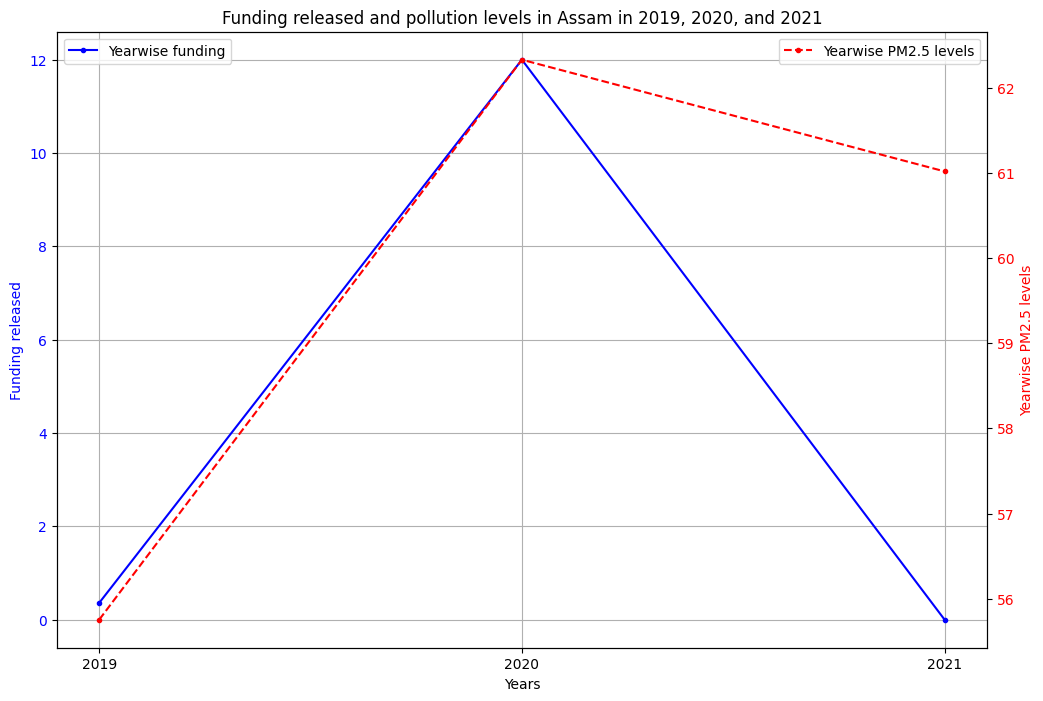

In [38]:
years = [2019,2020,2021]
yf = []
yp = []
funding['Amount released during FY 2019-20'] = funding['Amount released during FY 2019-20'].replace('-', np.nan).astype(float)
funding['Amount released during FY 2020-21'] = funding['Amount released during FY 2020-21'].replace('-', np.nan).astype(float)
funding['Amount released during FY 2021-22'] = funding['Amount released during FY 2021-22'].replace('-', np.nan).astype(float)
for year in years:
  yf.append(funding[f'Amount released during FY {year}-{year+1-2000}'].loc[funding['State'] == 'Assam'].sum())
  yp.append(data[(data['Timestamp'].dt.year == year) & (data['state'] == 'Assam')]['PM2.5'].mean())
fig, ax1 = plt.subplots(figsize = (12,8))
ax1.plot(years, yf, label = 'Yearwise funding', color = 'blue', marker = '.')
ax1.set_xlabel('Years')
ax1.set_ylabel('Funding released', color = 'blue')
ax2 = ax1.twinx()
ax2.plot(years, yp, label = 'Yearwise PM2.5 levels', color = 'red', linestyle = '--', marker = '.')
ax2.set_ylabel('Yearwise PM2.5 levels', color = 'red')
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')
plt.xticks(years)
ax1.grid(True)
plt.title('Funding released and pollution levels in Assam in 2019, 2020, and 2021')
plt.show()

**3. Create a scatter plot to showcase the area versus funding received by a state. Mark
every state with a different color and show the legend outside the plot.**

# Miscellaneous Questions

**1. For the most polluted city in 2023 (highest average pollution in 2023), calculate the
percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)**

In [13]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

mask5 = data['Timestamp'].dt.year == 2023
copy5 = data[mask5].reset_index()
city_pollution = copy5.groupby('city')['PM2.5'].mean()
most_polluted_city = city_pollution.idxmax()
print(f"Most polluted city in 2023 is {most_polluted_city} with an average of {city_pollution.max()}")

data_mpc = copy5[copy5['city'] == most_polluted_city]
hazardous = data_mpc[data_mpc['PM2.5']>300]

total_days = data_mpc['Timestamp'].nunique()
hazardous_days = hazardous['Timestamp'].nunique()
percentage_hazardous = (hazardous_days/total_days)*100
print(f"The percentage of hazardous days in the most polluted city in 2023 is {round(percentage_hazardous,2)}%")

Most polluted city in 2023 is Darbhanga with an average of 242.91703203305738
The percentage of hazardous days in the most polluted city in 2023 is 0.82%


**2. Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year
compared to regular months over the 3 years (2018-2020). Do you observe any
significant pollution spikes during these festivals? If spikes are observed, Can you mark
these spikes using arrows?**

C:\Users\Pratik Kumar Dhakar\AppData\Local\Temp\ipykernel_26684\1915485070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data["Year"] = delhi_data["Timestamp"].dt.year
C:\Users\Pratik Kumar Dhakar\AppData\Local\Temp\ipykernel_26684\1915485070.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data["Month"] = delhi_data["Timestamp"].dt.month


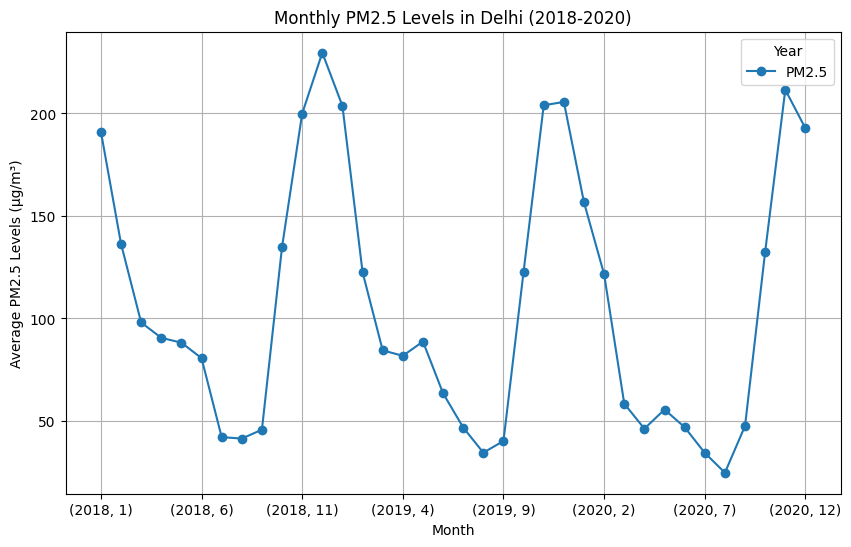

In [14]:
delhi_data = data[(data["city"] == "Delhi") & (data["Timestamp"].dt.year.isin([2018, 2019, 2020]))]

delhi_data["Year"] = delhi_data["Timestamp"].dt.year
delhi_data["Month"] = delhi_data["Timestamp"].dt.month

monthly_avg_pm25 = delhi_data.groupby(["Year", "Month"])["PM2.5"].mean()

plt.figure(figsize=(10, 6))
monthly_avg_pm25.plot(marker='o', ax=plt.gca())

plt.xlabel("Month")
plt.ylabel("Average PM2.5 Levels (µg/m³)")
plt.title("Monthly PM2.5 Levels in Delhi (2018-2020)")
plt.legend(title="Year")
plt.grid(True)
plt.show()


**3. Identify the state that received the highest NCAP funding in 2020 and determine if its air
pollution levels improved significantly by 2023. Use a line graph to compare yearly
average PM2.5 trends.**

The state that received highest NCAP funding is Andhra Pradesh with total funding of 17.28 crores


C:\Users\Pratik Kumar Dhakar\AppData\Local\Temp\ipykernel_26684\271089513.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  copy6 = copy6[(data['Timestamp'].dt.year > 2019) & (data['Timestamp'].dt.year < 2024)]


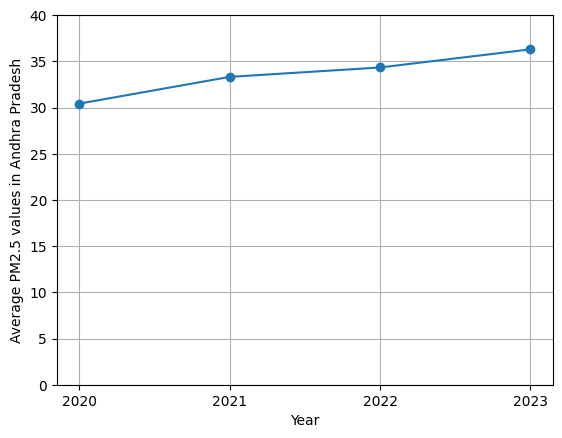

In [15]:
fund_2020 = funding['Amount released during FY 2020-21']
fund_2020 = fund_2020.replace('-', 0)
fund_2020 = fund_2020.astype(float)
funding['Amount released during FY 2020-21'] = fund_2020

funds_state = funding.groupby('State')['Amount released during FY 2020-21'].sum()
max_fund = funds_state.idxmax()
print(f"The state that received highest NCAP funding is {max_fund} with total funding of {funds_state.max()} crores")

mask6 = data['state'] == max_fund
copy6 = data[mask6]

copy6 = copy6[(data['Timestamp'].dt.year > 2019) & (data['Timestamp'].dt.year < 2024)]
year_avg = copy6.groupby(data['Timestamp'].dt.year)['PM2.5'].mean()

x = year_avg.index
y = year_avg
plt.plot(x,y, marker = 'o')
plt.xticks(range(2020, 2024))
plt.ylim(0,40)
plt.xlabel('Year')
plt.ylabel(f'Average PM2.5 values in {max_fund}')
plt.grid(True)
plt.show()

We can see through the graph that the air pollution level in Andhra Pradesh did not improved by the year 2023, but increased only.

**4. Draw the map of India and plot the sensor locations on the map**

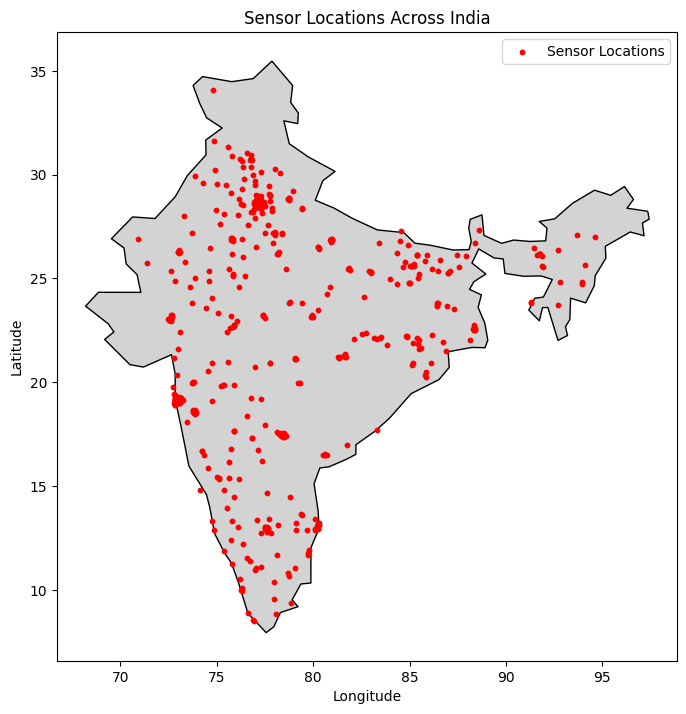

In [16]:
import geopandas as gpd

india_map = gpd.read_file("C:/Users/Pratik Kumar Dhakar/Downloads/Countries/ne_110m_admin_0_countries.shp")
india_map = india_map[india_map["ADMIN"] == "India"]

toplot = data.drop_duplicates(subset='station')

fig, ax = plt.subplots(figsize=(8, 10))
india_map.plot(ax=ax, color="lightgrey", edgecolor="black")
ax.scatter(toplot["longitude"], toplot["latitude"], color="red", s= 10, label="Sensor Locations")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Sensor Locations Across India")
plt.legend()
plt.show()

# Tell us something new

**Tell us something interesting from the dataset that we have not asked. Anything that
intrigues you, anything that might be useful to the policymakers**

In [ ]:
'''We found that even though funds were allocated to states to control pm2.5 levels still many states saw increase in Average PM2.5 levels this indicated that an important step to curb the levels is to curb bureaucratic corruption so as the funds are actually used to control pm2.5 levels.'''